#Notebook 6.2 Gradient descent

###1. Gerekli Kütüphaneleri İçe Aktarma

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


###2. Eğitim Verilerini Oluşturma

In [48]:
# Eğitim verilerini oluştur: 12 çift {x_i, y_i}
# Bu verilere düz bir doğrusal model uyduracağız
data = np.array([[0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90],
                 [0.67, 0.85, 1.05, 1.00, 1.40, 1.50, 1.30, 1.54, 1.55, 1.68, 1.73, 1.60]])


###3. Modeli Tanımlama

In [49]:
# Modeli tanımlayalım -- sadece kesişim phi[0] ve eğim phi[1] olan düz bir çizgi
def model(phi, x):
    y_pred = phi[0] + phi[1] * x
    return y_pred


###4. Modeli Çizme Fonksiyonu

In [50]:
# Modeli çizme fonksiyonu
def draw_model(data, model, phi, title=None):
    x_model = np.arange(0, 2, 0.01)
    y_model = model(phi, x_model)

    fig, ax = plt.subplots()
    ax.plot(data[0,:], data[1,:], 'bo')
    ax.plot(x_model, y_model, 'm-')
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)
    plt.show()


###5. Başlangıç Parametrelerini Tanımlama ve Modeli Çizme

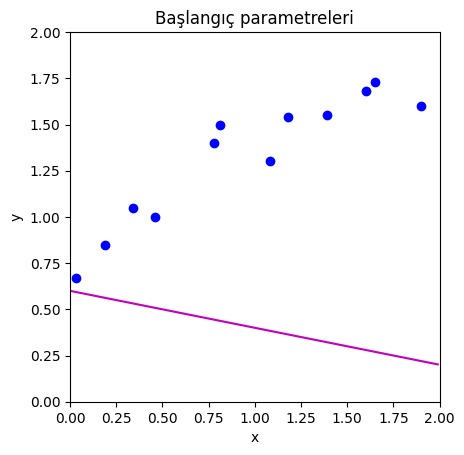

In [51]:
# Başlangıç parametrelerini rastgele bir şekilde başlat ve modeli çiz
phi = np.zeros((2, 1))
phi[0] = 0.6      # Kesişim
phi[1] = -0.2     # Eğim
draw_model(data, model, phi, "Başlangıç parametreleri")


###6. Kayıp Fonksiyonunu Hesaplama

In [52]:
# Şimdi eğitim verileri için toplam kareler kaybını hesaplayalım
def compute_loss(data_x, data_y, model, phi):
    # Model tahminlerini veriler x için hesapla
    pred_y = model(phi, data_x)
    # Tahminler ile gerçek y değerleri arasındaki kare farkları hesapla
    # Sonra tüm farkları topla ve sonucu döndür
    loss = np.sum((pred_y - data_y)**2)
    return loss


###7. Kayıp Fonksiyonu Testi

In [53]:
# Doğru sonuçla karşılaştırarak kaybı test edelim
loss = compute_loss(data[0,:], data[1,:], model, np.array([[0.6],[-0.2]]))
print('Hesapladığınız kayıp = %3.3f, Doğru kayıp = %3.3f' % (loss, 12.367))


Hesapladığınız kayıp = 12.367, Doğru kayıp = 12.367


###8. Kayıp Fonksiyonunu Çizme

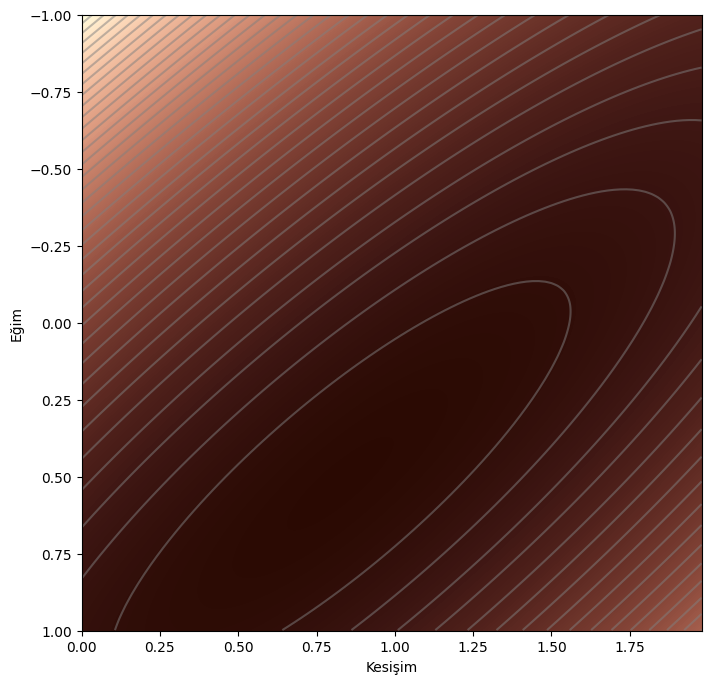

In [54]:
# Şimdi tüm kayıp fonksiyonunu çizelim
def draw_loss_function(compute_loss, data, model, phi_iters=None):
    # Güzel bir renk haritası tanımlayalım
    my_colormap_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element, base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec / (256*256))
    g = np.floor((my_colormap_vals_dec - r * 256 * 256) / 256)
    b = np.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)
    my_colormap = ListedColormap(np.vstack((r, g, b)).transpose() / 255.0)

    # Kesişim / eğim değerlerinin ızgarasını oluşturalım
    intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0, 2.0, 0.02), np.arange(-1.0, 1.0, 0.002))
    loss_mesh = np.zeros_like(slopes_mesh)
    # Parametreler için kaybı hesapla
    for idslope, slope in np.ndenumerate(slopes_mesh):
        loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(intercepts_mesh, slopes_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(intercepts_mesh, slopes_mesh, loss_mesh, 40, colors=['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0,:], phi_iters[1,:], 'go-')
    ax.set_ylim([1, -1])
    ax.set_xlabel('Kesişim')
    ax.set_ylabel('Eğim')
    plt.show()

draw_loss_function(compute_loss, data, model)


###9. Gradyan Hesaplama Fonksiyonu

In [55]:
# Şimdi bir parametre kümesi için gradyan vektörünü hesaplayalım:
def compute_gradient(data_x, data_y, phi):
    # Tahminleri hesapla
    pred_y = model(phi, data_x)
    # Gradyan için kısmi türevleri hesapla
    dl_dphi0 = -2 * np.sum(data_y - pred_y)
    dl_dphi1 = -2 * np.sum((data_y - pred_y) * data_x)

    # Gradyanı döndür
    return np.array([[dl_dphi0], [dl_dphi1]])

# Gradyanı hesaplayalım
gradient = compute_gradient(data[0,:], data[1,:], phi)
print("Hesapladığınız gradyanlar: (%3.3f, %3.3f)" % (gradient[0, 0], gradient[1, 0]))  # Burada tekil öğeyi alıyoruz


Hesapladığınız gradyanlar: (-21.904, -26.840)


###10. Finite Differences Yöntemiyle Yaklaşık Gradyan Hesaplama

In [56]:
# Sonuçları yaklaşık olarak finite differences yöntemiyle kontrol edelim
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([[delta], [0]])) - \
                 compute_loss(data[0,:], data[1,:], model, phi)) / delta
dl_dphi1_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([[0], [delta]])) - \
                 compute_loss(data[0,:], data[1,:], model, phi)) / delta
print("Yaklaşık gradyanlar: (%3.3f, %3.3f)" % (dl_dphi0_est, dl_dphi1_est))


Yaklaşık gradyanlar: (-21.903, -26.839)


###11. Gradyan İnişi Fonksiyonu ve Adım Hesaplama

In [57]:
# Şimdi gradyan inişini uygulamaya başlayalım. Arama fonksiyonu aşağıda verildiği gibi kullanacağız
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
    # Bu kadar mesafe hareket ettikten sonra kaybı döndür
    return compute_loss(data[0,:], data[1,:], model, phi_start - search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=0.00001, max_dist=0.1, max_iter=15, verbose=False):
    # Aradığımız mesafe aralığında dört nokta başlat
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # Minimumu bulana kadar arama yapalım
    while np.abs(b - c) > thresh and n_iter < max_iter:
        n_iter = n_iter + 1
        # Dört nokta için kayıpları hesapla
        lossa = loss_function_1D(a, data, model, phi, gradient)
        lossb = loss_function_1D(b, data, model, phi, gradient)
        lossc = loss_function_1D(c, data, model, phi, gradient)
        lossd = loss_function_1D(d, data, model, phi, gradient)

        if verbose:
            print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f' % (n_iter, a, b, c, d))
            print('a %f, b %f, c %f, d %f' % (lossa, lossb, lossc, lossd))

        # Kural #1: Eğer nokta A, B, C ve D'den daha küçükse, mesafeyi yarıya böl
        if np.argmin((lossa, lossb, lossc, lossd)) == 0:
            b = a + (b - a) / 2
            c = a + (c - a) / 2
            d = a + (d - a) / 2
            continue;

        # Kural #2: Eğer b, c'den küçükse
        #             d, c olur ve b, a ile yeni d arasında 1/3 mesafede olur
        #             c, a ile yeni d arasında 2/3 mesafede olur
        if lossb < lossc:
            d = c
            b = a + (d - a) / 3
            c = a + 2 * (d - a) / 3
            continue

        # Kural #3: Eğer c, b'den küçükse
        #             a, b olur ve b, a ile d arasında 1/3 mesafede olur
        #             c, a ile d arasında 2/3 mesafede olur
        a = b
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3

    # İki orta noktanın ortalamasını döndür
    return (b + c) / 2.0

def gradient_descent_step(phi, data, model):
    # 1. Gradyanı hesapla
    gradient = compute_gradient(data[0,:], data[1,:], phi)

    # 2. En iyi adım uzunluğunu bulmak için line_search fonksiyonunu kullan
    alpha = line_search(data, model, phi, gradient)

    # 3. Parametreleri gradyan ve adım uzunluğu alpha ile güncelle
    phi_new = phi - alpha * gradient
    return phi_new


###12. Gradyan İnişi ve Sonuçları Görselleştirme

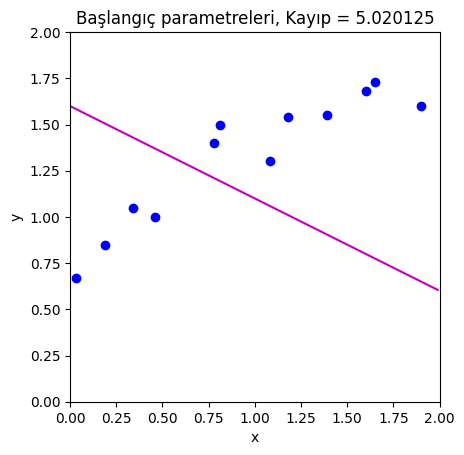

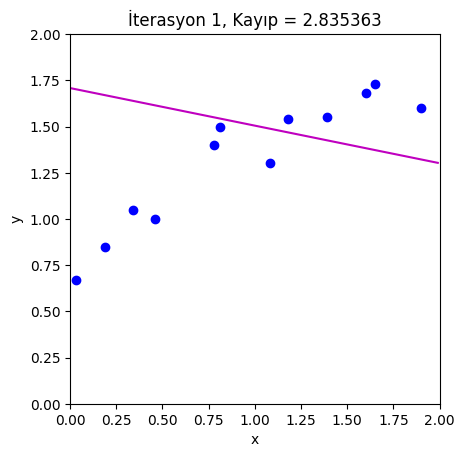

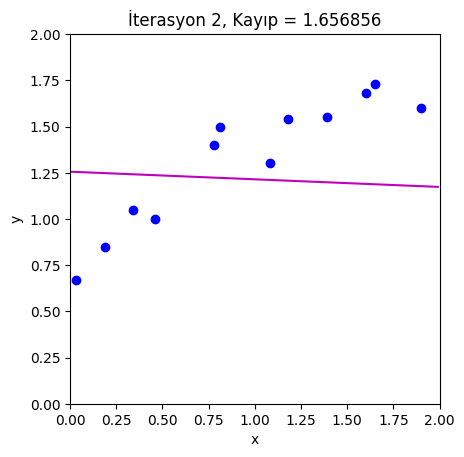

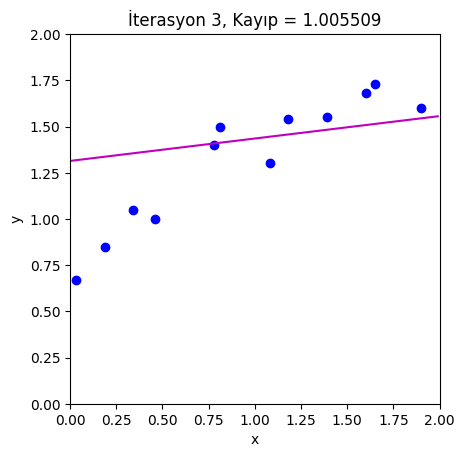

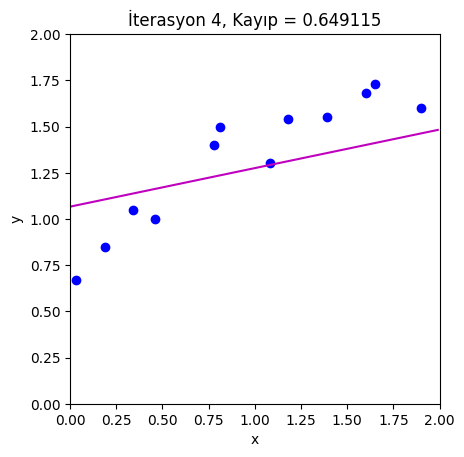

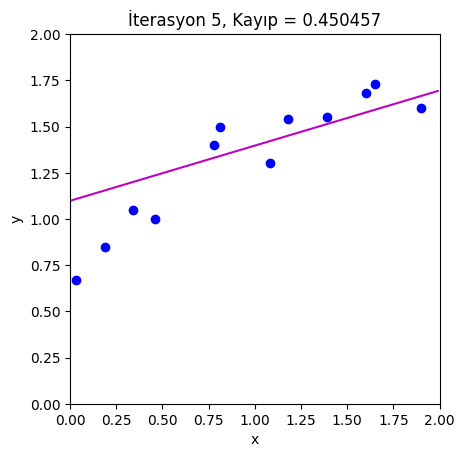

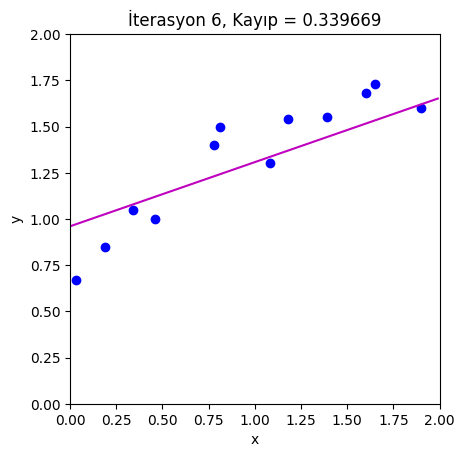

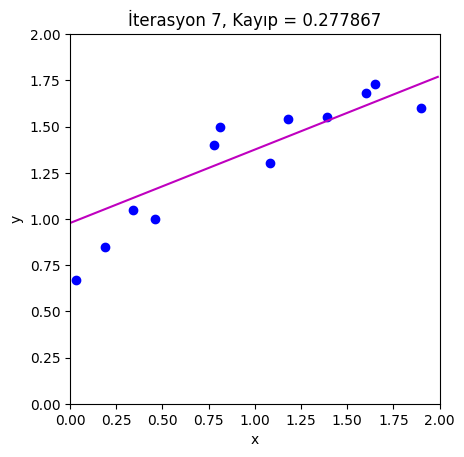

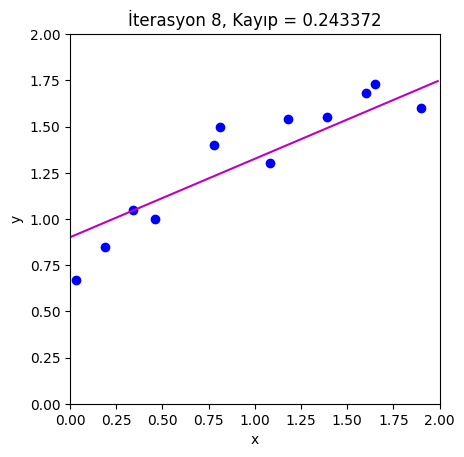

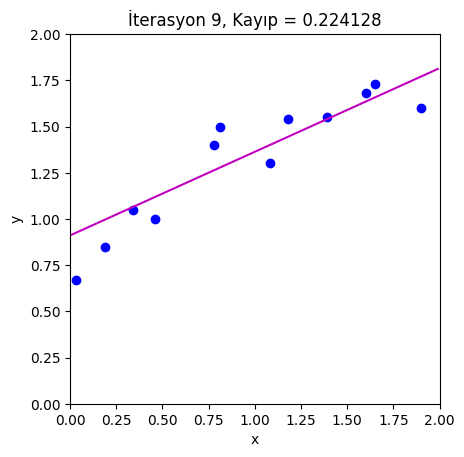

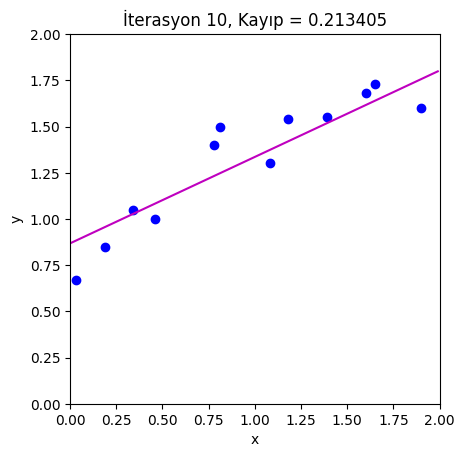

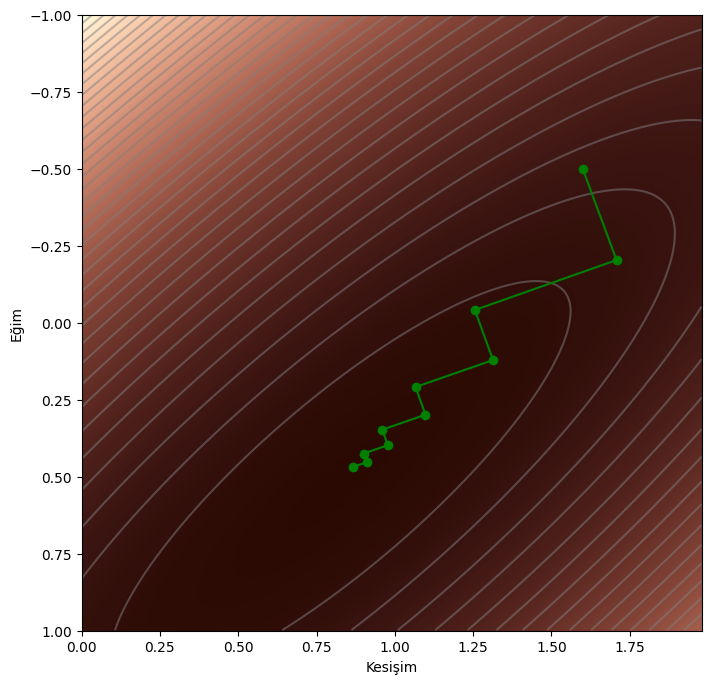

In [58]:
# Parametreleri başlat ve modeli çiz
n_steps = 10
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = 1.6
phi_all[1, 0] = -0.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, 0:1])
draw_model(data, model, phi_all[:, 0:1], "Başlangıç parametreleri, Kayıp = %f" % (loss))

# Ardından gradyan inişi adımlarını al
for c_step in range(n_steps):
    # Gradyan inişi adımını yap
    phi_all[:, c_step + 1:c_step + 2] = gradient_descent_step(phi_all[:, c_step:c_step + 1], data, model)
    # Kaybı ölç ve modeli çiz
    loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step + 1:c_step + 2])
    draw_model(data, model, phi_all[:, c_step + 1], "İterasyon %d, Kayıp = %f" % (c_step + 1, loss))

# Kayıp fonksiyonu üzerinde trajeyi çiz
draw_loss_function(compute_loss, data, model, phi_all)


#Notebook 6.3: Stochastic gradient descent

###1. Gerekli Kütüphaneleri İçe Aktarma

In [59]:
# Kütüphaneleri içe aktar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


###2. Eğitim Verilerini Oluşturma

In [60]:
# Eğitim verilerini oluştur: 30 çift {x_i, y_i}
# Bu verilere Gabor modelini uyarlayacağız
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])


###3. Modeli Tanımlama

In [61]:
# Modeli tanımlayalım
def model(phi, x):
    sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
    gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
    y_pred = sin_component * gauss_component
    return y_pred


###4. Modeli Çizme Fonksiyonu

In [62]:
# Modeli çizme fonksiyonu
def draw_model(data, model, phi, title=None):
    x_model = np.arange(-15, 15, 0.1)
    y_model = model(phi, x_model)

    fig, ax = plt.subplots()
    ax.plot(data[0,:], data[1,:], 'bo')
    ax.plot(x_model, y_model, 'm-')
    ax.set_xlim([-15, 15])
    ax.set_ylim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title is not None:
        ax.set_title(title)
    plt.show()


###5. Başlangıç Parametrelerini Tanımlama ve Modeli Çizme

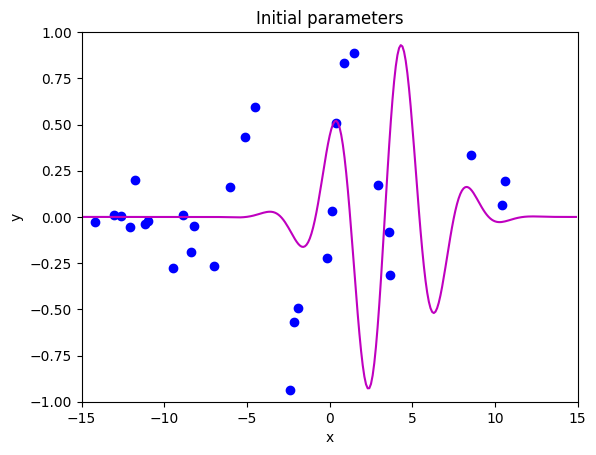

In [63]:
# Başlangıç parametrelerini rastgele bir şekilde başlat ve modeli çiz
phi = np.zeros((2, 1))
phi[0] =  -5     # Yatay kayma
phi[1] =  25     # Frekans
draw_model(data, model, phi, "Initial parameters")


###6. Kayıp Fonksiyonunu Hesaplama

In [64]:
# Şimdi eğitim verileri için toplam kareler kaybını hesaplayalım
def compute_loss(data_x, data_y, model, phi):
    # Model tahminlerini veriler x için hesapla
    pred_y = model(phi, data_x)
    # Tahminler ile gerçek y değerleri arasındaki kare farkları hesapla
    # Sonra tüm farkları topla ve sonucu döndür
    loss = np.sum((pred_y - data_y)**2)
    return loss


###7. Kayıp Fonksiyonunu Test Etme

In [65]:
# Doğru sonuçla karşılaştırarak kaybı test edelim
loss = compute_loss(data[0,:], data[1,:], model, np.array([[0.6],[-0.2]]))
print('Hesapladığınız kayıp = %3.3f, Doğru kayıp = %3.3f' % (loss, 16.419))


Hesapladığınız kayıp = 16.419, Doğru kayıp = 16.419


###8. Kayıp Fonksiyonunu Çizme

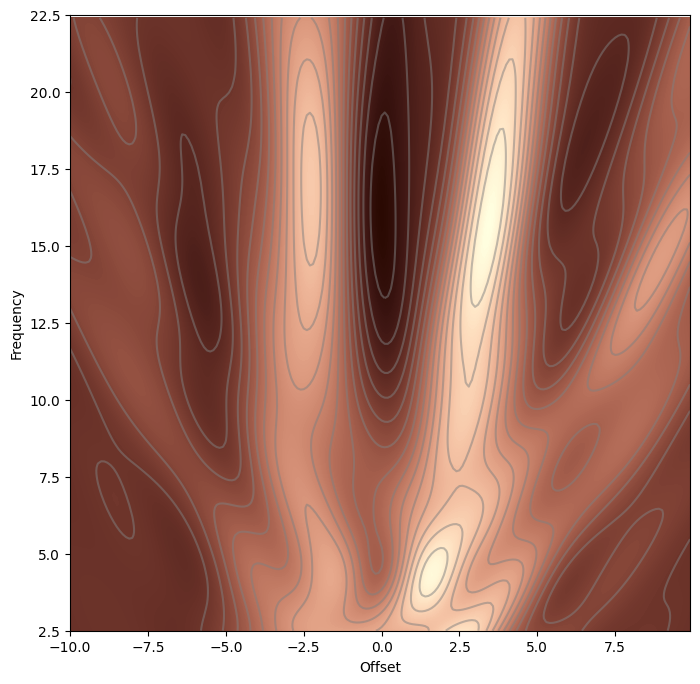

In [66]:
# Şimdi tüm kayıp fonksiyonunu çizelim
def draw_loss_function(compute_loss, data, model, phi_iters=None):
    # Güzel bir renk haritası tanımlayalım
    my_colormap_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
    b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
    my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

    # Offset/frekans değerleri için ızgarayı oluştur
    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10, 10.0, 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)
    # Parametreler için kaybı hesapla
    for idslope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(offsets_mesh, freqs_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 20, colors=['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0,:], phi_iters[1,:], 'go-')
    ax.set_ylim([2.5, 22.5])
    ax.set_xlabel('Offset')
    ax.set_ylabel('Frequency')
    plt.show()

draw_loss_function(compute_loss, data, model)


###9. Gabor Gradyan Hesaplama Fonksiyonları

In [67]:
# Derivasyonlar
def gabor_deriv_phi0(data_x, data_y, phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y, phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x * sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0], phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0], phi[1])
    # Gradyanı döndür
    return np.array([[dl_dphi0], [dl_dphi1]])


###10. Gradyan Hesaplama ve Yaklaşık Gradyan

In [68]:
# Gradyanı hesaplayalım
gradient = compute_gradient(data[0,:], data[1,:], phi)
print("Hesapladığınız gradyanlar: (%3.3f, %3.3f)" % (gradient[0, 0], gradient[1, 0]))

# Finite differences yöntemiyle yaklaşık gradyanları hesaplayalım
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([[delta], [0]])) - \
                 compute_loss(data[0,:], data[1,:], model, phi)) / delta
dl_dphi1_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([[0], [delta]])) - \
                 compute_loss(data[0,:], data[1,:], model, phi)) / delta
print("Yaklaşık gradyanlar: (%3.3f, %3.3f)" % (dl_dphi0_est, dl_dphi1_est))


Hesapladığınız gradyanlar: (3.344, 0.519)
Yaklaşık gradyanlar: (3.344, 0.519)


###11. Gradyan İnişi Adımını Hesaplama

In [69]:
# Gradyan inişi için adım fonksiyonlarını tanımlayalım
def loss_function_1D(dist_prop, data, model, phi_start, gradient):
    # Bu kadar mesafe hareket ettikten sonra kaybı döndür
    return compute_loss(data[0,:], data[1,:], model, phi_start + gradient * dist_prop)

def line_search(data, model, phi, gradient, thresh=0.00001, max_dist=0.1, max_iter=15, verbose=False):
    # Arama mesafesi üzerinde dört nokta başlat
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # Minimumu bulana kadar arama yapalım
    while np.abs(b - c) > thresh and n_iter < max_iter:
        n_iter += 1
        # Dört nokta için kayıpları hesapla
        lossa = loss_function_1D(a, data, model, phi, gradient)
        lossb = loss_function_1D(b, data, model, phi, gradient)
        lossc = loss_function_1D(c, data, model, phi, gradient)
        lossd = loss_function_1D(d, data, model, phi, gradient)

        if verbose:
            print(f'Iter {n_iter}, a={a:.3f}, b={b:.3f}, c={c:.3f}, d={d:.3f}')
            print(f'a {lossa}, b {lossb}, c {lossc}, d {lossd}')

        # Kural #1: Nokta A, B, C, D'den daha küçükse mesafeleri yarıya böl
        if np.argmin((lossa, lossb, lossc, lossd)) == 0:
            b = a + (b - a) / 2
            c = a + (c - a) / 2
            d = a + (d - a) / 2
            continue

        # Kural #2: Eğer b, c'den küçükse, d'yi c'ye eşitle ve b'yi a ile yeni d arasında 1/3 mesafeye yerleştir
        if lossb < lossc:
            d = c
            b = a + (d - a) / 3
            c = a + 2 * (d - a) / 3
            continue

        # Kural #3: Eğer c, b'den küçükse, a'yı b'ye eşitle ve b'yi yeni a ile d arasında 1/3 mesafeye yerleştir
        a = b
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3

    # İki orta noktanın ortalamasını döndür
    return (b + c) / 2.0


###12. Gradyan İnişi Adımını Hesaplama

In [70]:
def gradient_descent_step(phi, data, model):
    # Adım 1: Gradyanı hesapla
    gradient = compute_gradient(data[0,:], data[1,:], phi)
    # Adım 2: Parametreleri güncelle -- negatif yönde arama yapacağız
    alpha = line_search(data, model, phi, gradient * -1, max_dist=2.0)
    phi = phi - alpha * gradient
    return phi


###13. Gradyan İnişi ile Modeli Eğitme

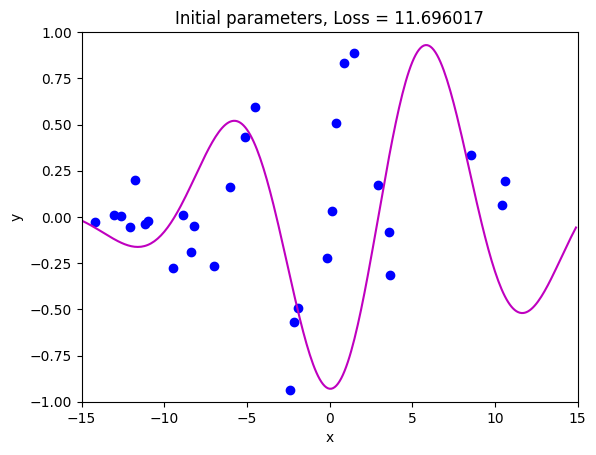

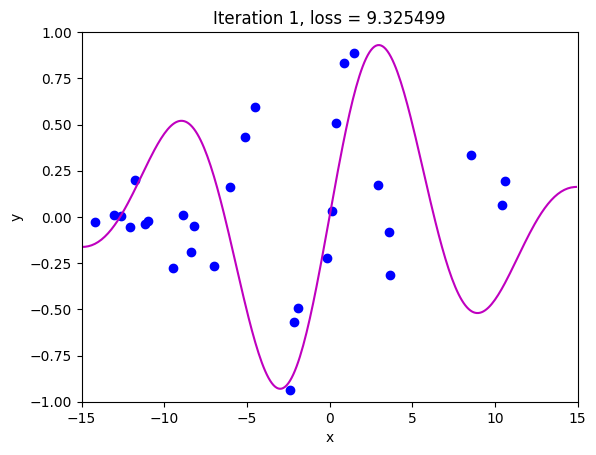

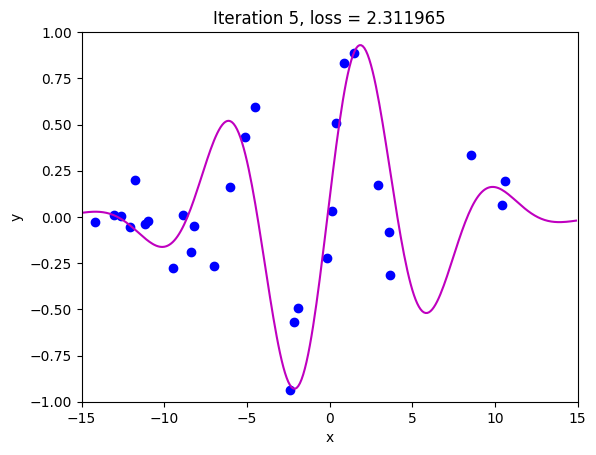

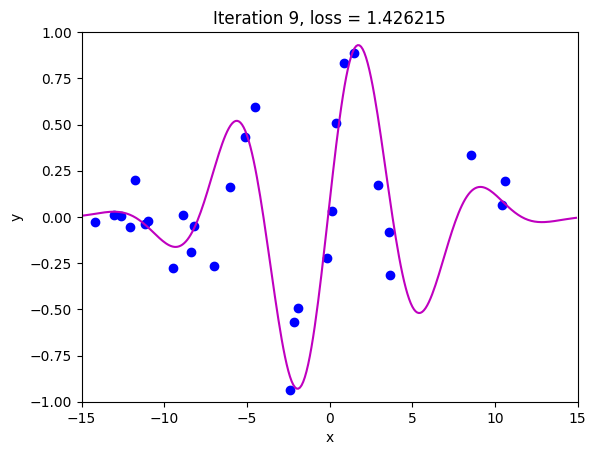

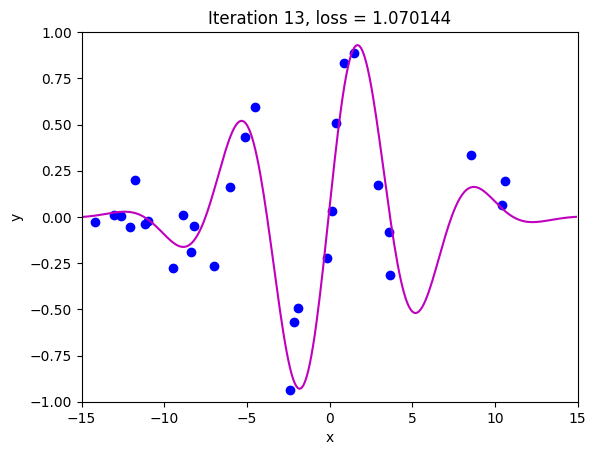

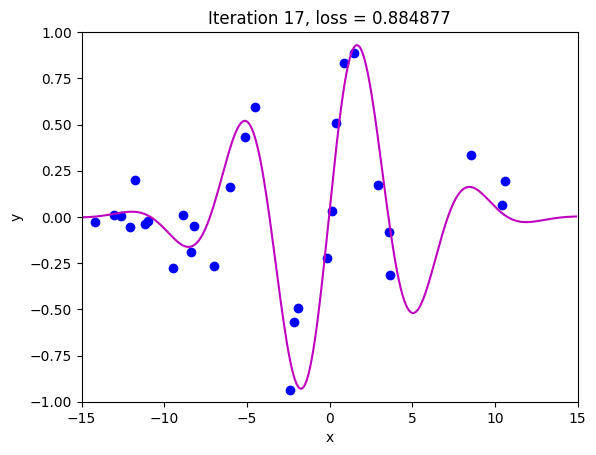

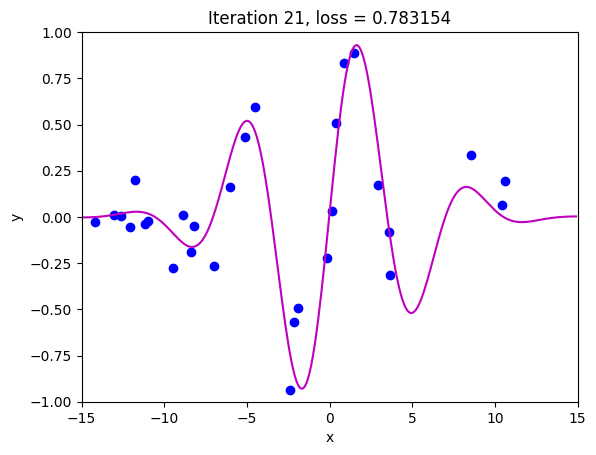

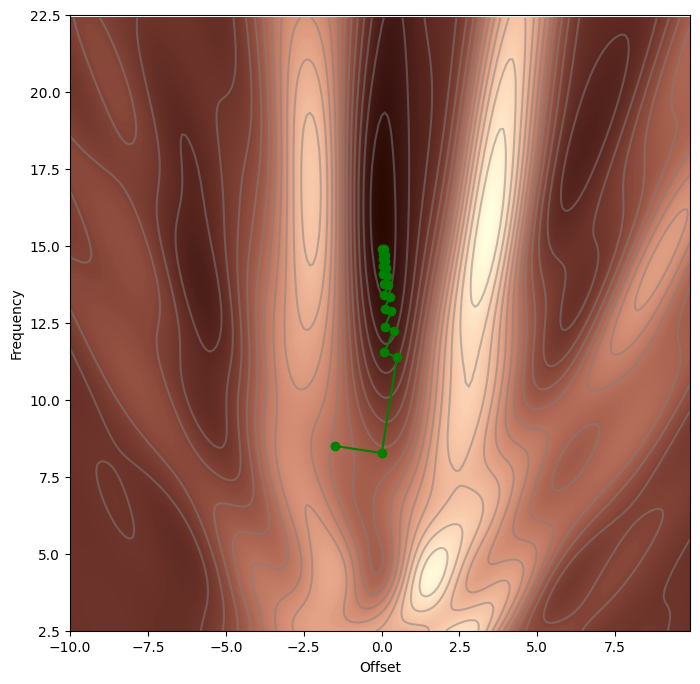

In [71]:
# Parametreleri başlat ve modeli çiz
n_steps = 21
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = -1.5
phi_all[1, 0] = 8.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:, 0:1], f"Initial parameters, Loss = {loss:.6f}")

for c_step in range(n_steps):
    # Gradyan inişi adımını yap
    phi_all[:, c_step + 1:c_step + 2] = gradient_descent_step(phi_all[:, c_step:c_step + 1], data, model)
    # Kaybı ölç ve her 4. adımda modeli çiz
    if c_step % 4 == 0:
        loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step + 1:c_step + 2])
        draw_model(data, model, phi_all[:, c_step + 1], f"Iteration {c_step + 1}, loss = {loss:.6f}")

draw_loss_function(compute_loss, data, model, phi_all)


###14. Sabit Öğrenme Oranı ile Gradyan İnişi

In [72]:
def gradient_descent_step_fixed_learning_rate(phi, data, alpha):
    # Sabit öğrenme oranı ile gradyan inişi adımını yap
    gradient = compute_gradient(data[0,:], data[1,:], phi)
    phi_new = phi - alpha * gradient
    return phi_new


###15. Sabit Öğrenme Oranı ile Modeli Eğitme

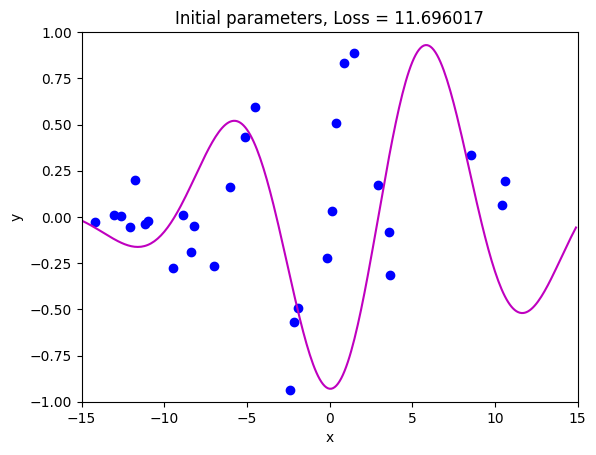

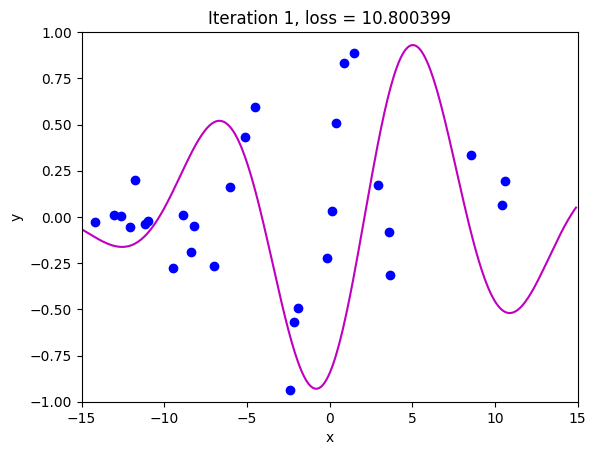

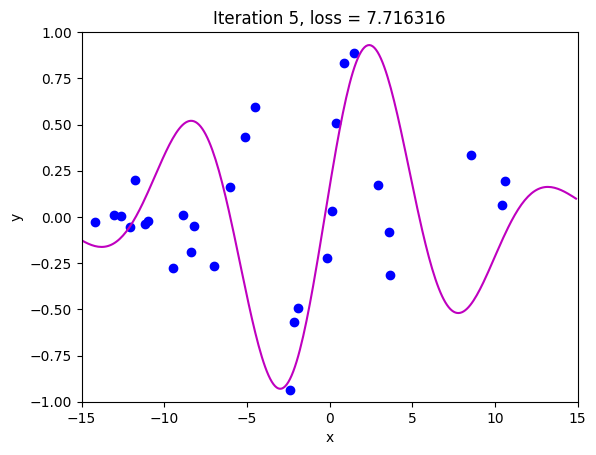

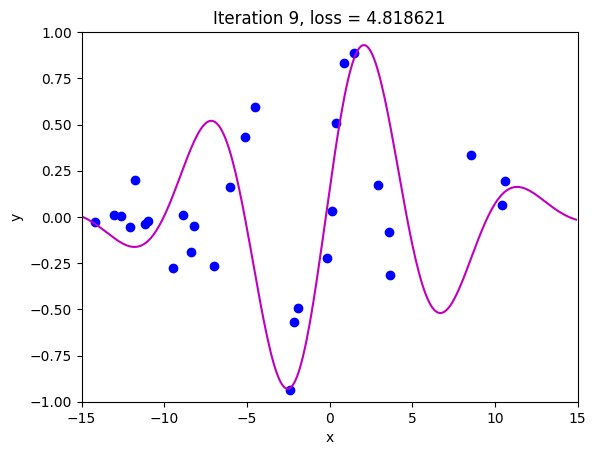

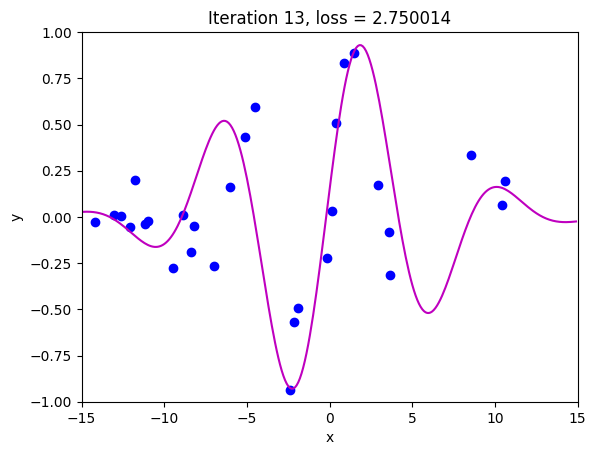

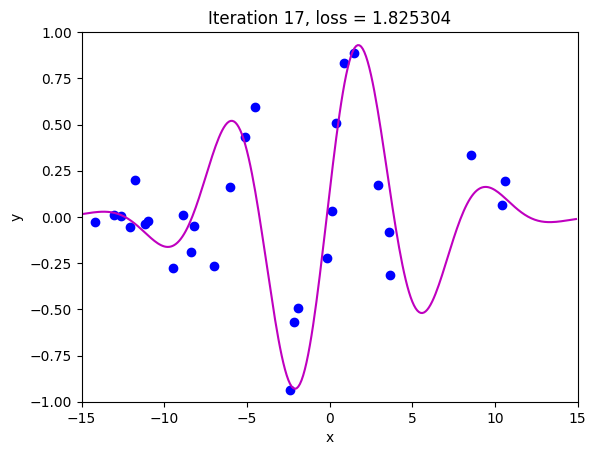

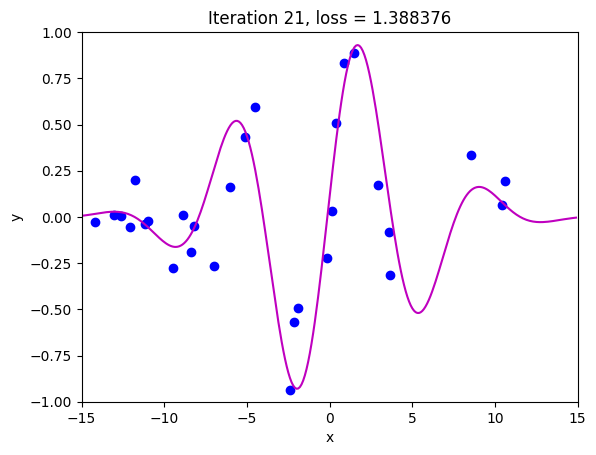

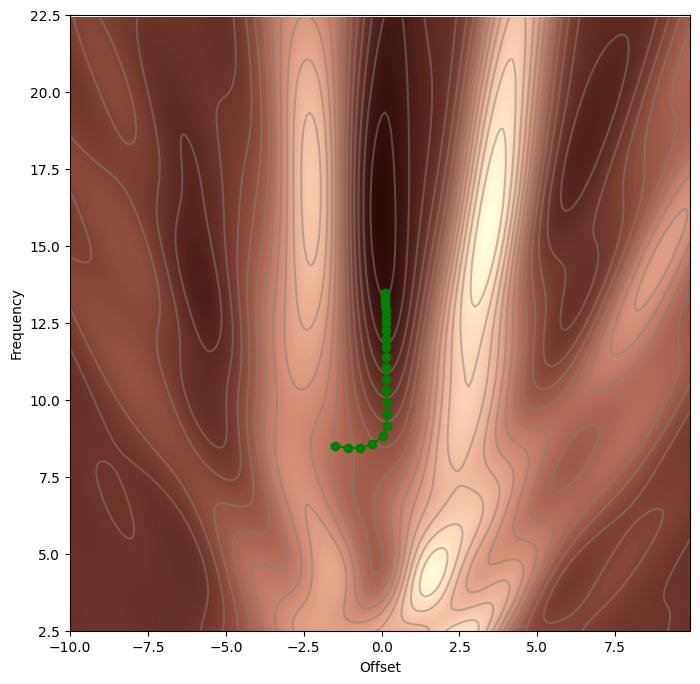

In [73]:
# Parametreleri başlat ve modeli çiz
n_steps = 21
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = -1.5
phi_all[1, 0] = 8.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, 0:1])
draw_model(data, model, phi_all[:, 0:1], f"Initial parameters, Loss = {loss:.6f}")

# Sabit öğrenme oranı ile gradyan inişi
for c_step in range(n_steps):
    # Gradyan inişi adımını yap
    phi_all[:, c_step + 1:c_step + 2] = gradient_descent_step_fixed_learning_rate(phi_all[:, c_step:c_step + 1], data, alpha=0.2)
    # Kaybı ölç ve her 4. adımda modeli çiz
    if c_step % 4 == 0:
        loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step + 1:c_step + 2])
        draw_model(data, model, phi_all[:, c_step + 1], f"Iteration {c_step + 1}, loss = {loss:.6f}")

draw_loss_function(compute_loss, data, model, phi_all)


###16. Stokastik Gradyan İnişi Adımı

In [74]:
def stochastic_gradient_descent_step(phi, data, alpha, batch_size):
    # Adım: Verilerin rastgele bir alt kümesiyle gradyan hesaplama
    n_data = data.shape[1]
    random_indices = np.random.permutation(n_data)
    batch_indices = random_indices[:batch_size]

    data_batch = data[:, batch_indices]
    gradient = compute_gradient(data_batch[0,:], data_batch[1,:], phi)

    # Sabit öğrenme oranı ile gradyan güncellemesi yap
    phi_new = phi - alpha * gradient
    return phi_new


###17. Stokastik Gradyan İnişi ile Modeli Eğitme

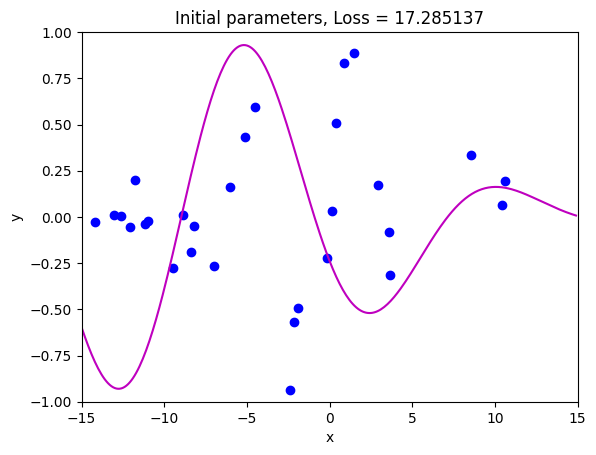

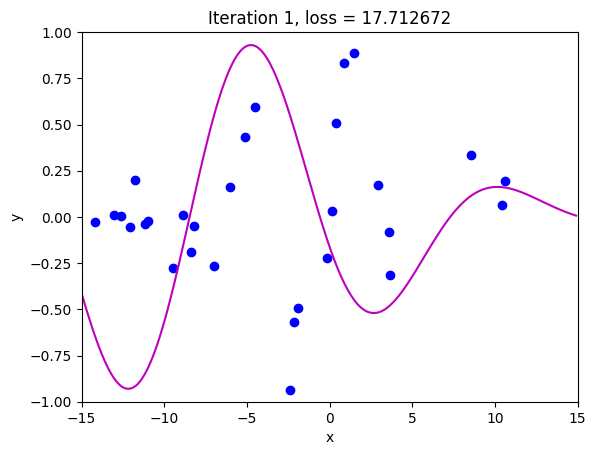

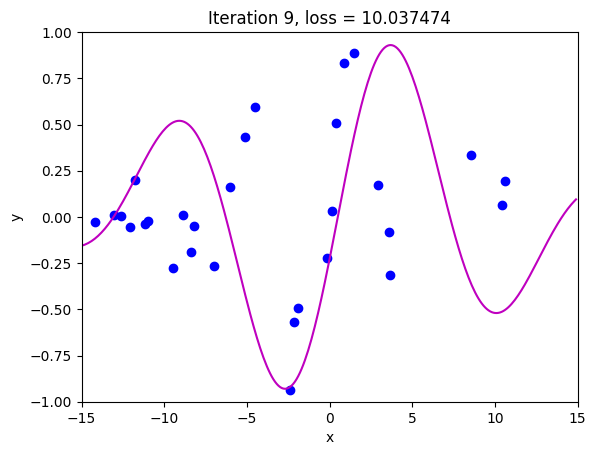

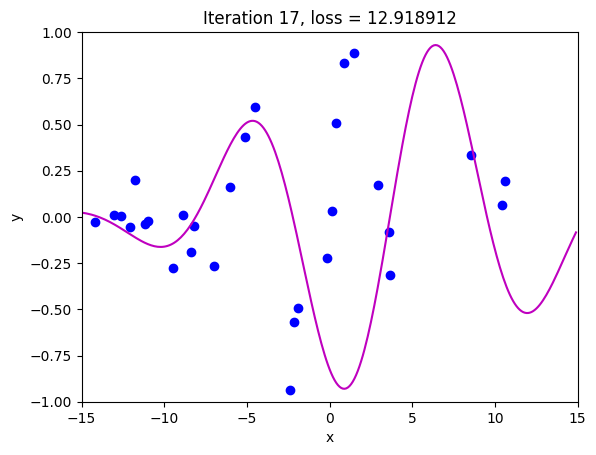

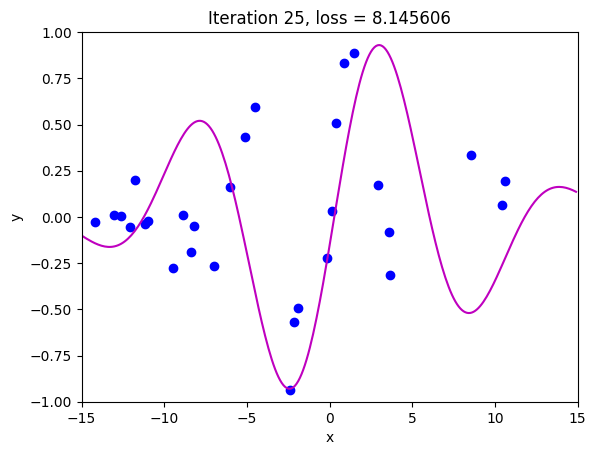

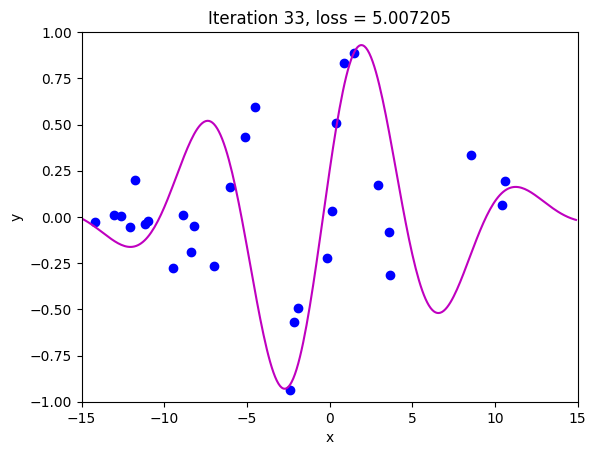

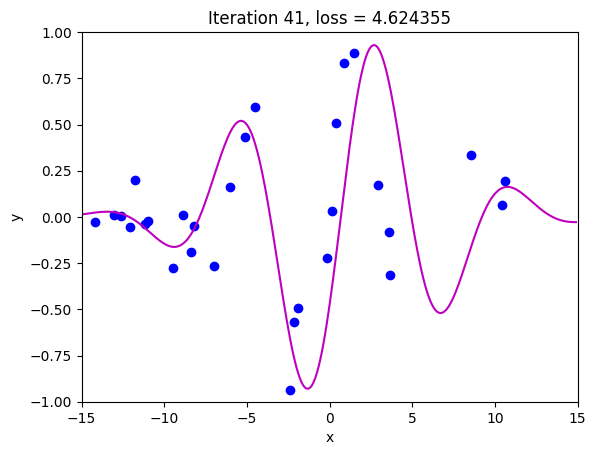

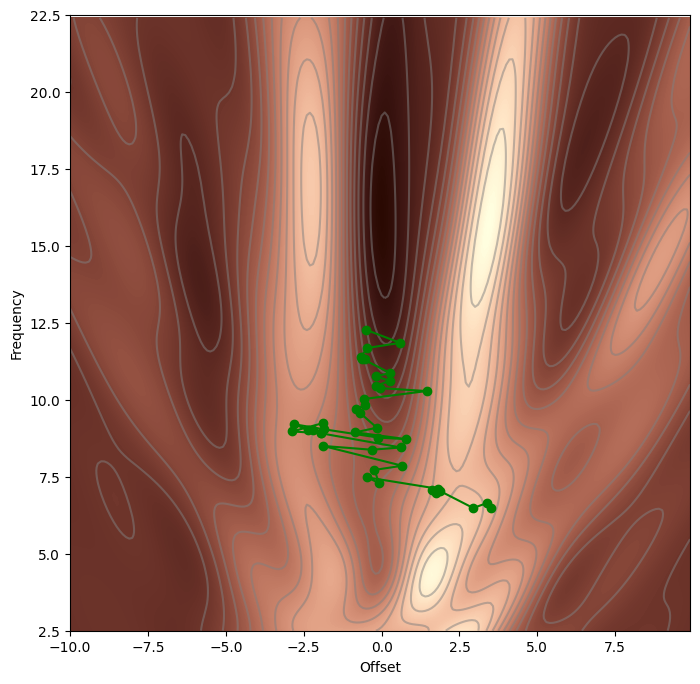

In [75]:
# Sabit öğrenme oranı ve batch boyutu ile stokastik gradyan inişi
np.random.seed(1)  # Aynı sonuçlar için sabit rastgelelik
n_steps = 41
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = 3.5
phi_all[1, 0] = 6.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:,0:1], f"Initial parameters, Loss = {loss:.6f}")

# Stokastik gradyan inişi adımlarını al
for c_step in range(n_steps):
    # Stokastik gradyan inişi adımını yap
    phi_all[:, c_step + 1:c_step + 2] = stochastic_gradient_descent_step(phi_all[:, c_step:c_step + 1], data, alpha=0.8, batch_size=5)
    # Kaybı ölç ve her 8. adımda modeli çiz
    if c_step % 8 == 0:
        loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step + 1:c_step + 2])
        draw_model(data, model, phi_all[:, c_step + 1], f"Iteration {c_step + 1}, loss = {loss:.6f}")

draw_loss_function(compute_loss, data, model, phi_all)


#Notebook 6.4: Momentum

###1. Gerekli Kütüphaneleri İçe Aktarma

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


###2. Eğitim Verilerini Oluşturma

In [77]:
# Eğitim verilerini oluştur: 30 çift {x_i, y_i}
# Bu verilere Gabor modelini uyarlayacağız
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])


###3. Modeli Tanımlama

In [78]:
# Modeli tanımlayalım
def model(phi, x):
    sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
    gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
    y_pred = sin_component * gauss_component
    return y_pred


###4. Modeli Çizme Fonksiyonu

In [79]:
# Modeli çizme fonksiyonu
def draw_model(data, model, phi, title=None):
    x_model = np.arange(-15, 15, 0.1)
    y_model = model(phi, x_model)

    fig, ax = plt.subplots()
    ax.plot(data[0,:], data[1,:], 'bo')
    ax.plot(x_model, y_model, 'm-')
    ax.set_xlim([-15, 15])
    ax.set_ylim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title is not None:
        ax.set_title(title)
    plt.show()


###5. Başlangıç Parametrelerini Tanımlama ve Modeli Çizme

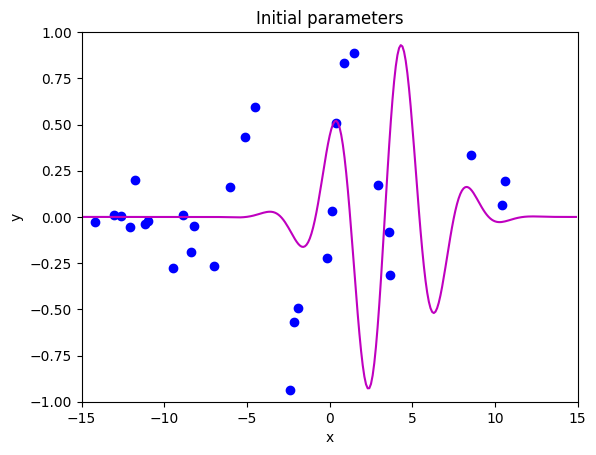

In [80]:
# Başlangıç parametrelerini rastgele bir şekilde başlat ve modeli çiz
phi = np.zeros((2, 1))
phi[0] =  -5     # Yatay kayma
phi[1] =  25     # Frekans
draw_model(data, model, phi, "Initial parameters")


###6. Kayıp Fonksiyonunu Hesaplama

In [81]:
# Şimdi eğitim verileri için toplam kareler kaybını hesaplayalım
def compute_loss(data_x, data_y, model, phi):
    pred_y = model(phi, data_x)
    loss = np.sum((pred_y - data_y) * (pred_y - data_y))
    return loss


###7. Kayıp Fonksiyonunu Çizme

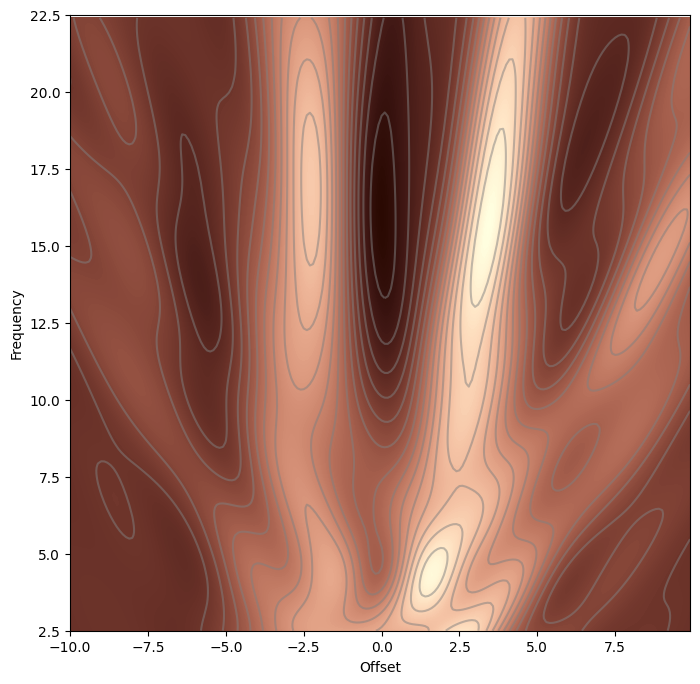

In [82]:
# Kayıp fonksiyonunu çizme
def draw_loss_function(compute_loss, data, model, phi_iters=None):
    # Güzel bir renk haritası tanımlayalım
    my_colormap_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element, base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec / (256*256))
    g = np.floor((my_colormap_vals_dec - r * 256 * 256) / 256)
    b = np.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)
    my_colormap = ListedColormap(np.vstack((r, g, b)).transpose() / 255.0)

    # Offset/frekans değerleri için ızgarayı oluştur
    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10, 10.0, 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)
    # Parametreler için kaybı hesapla
    for idslope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(offsets_mesh, freqs_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 20, colors=['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0,:], phi_iters[1,:], 'go-')
    ax.set_ylim([2.5, 22.5])
    ax.set_xlabel('Offset')
    ax.set_ylabel('Frequency')
    plt.show()

draw_loss_function(compute_loss, data, model)


###8. Gabor Gradyan Hesaplama Fonksiyonları

In [83]:
def gabor_deriv_phi0(data_x, data_y, phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y, phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x * sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0], phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0], phi[1])
    # Gradyanı döndür
    return np.array([[dl_dphi0], [dl_dphi1]])


###9. Stokastik Gradyan İnişi

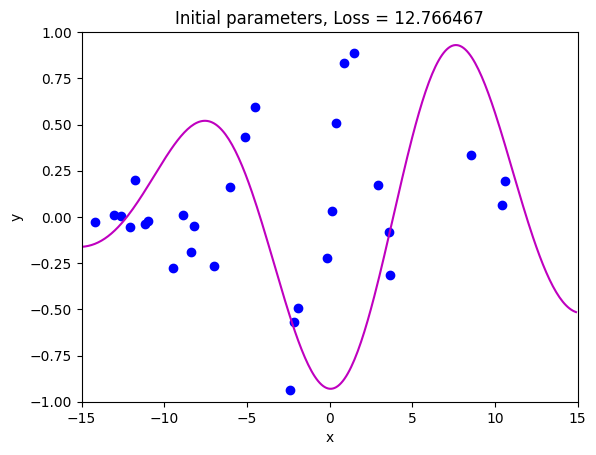

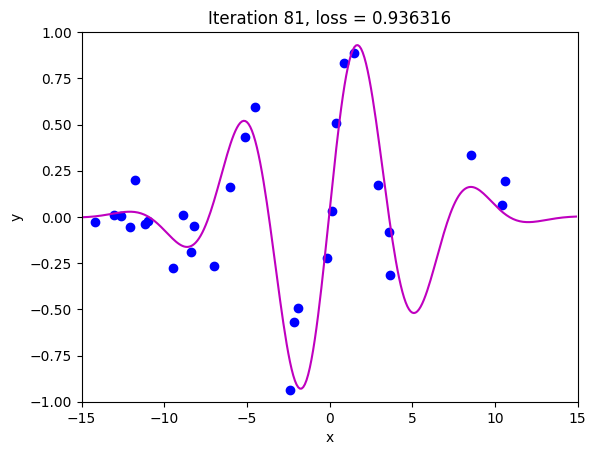

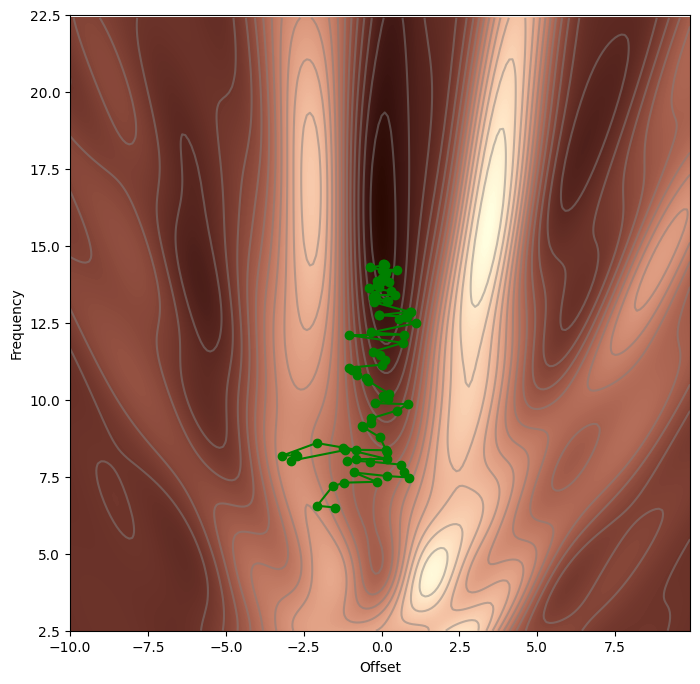

In [84]:
np.random.seed(1)  # Aynı sonuçları almak için sabit rastgelelik
n_steps = 81
batch_size = 5
alpha = 0.6
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = -1.5
phi_all[1, 0] = 6.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:,0:1], f"Initial parameters, Loss = {loss:.6f}")

for c_step in range(n_steps):
    # Rastgele batch indexlerini seç
    batch_index = np.random.permutation(data.shape[1])[0:batch_size]
    # Gradyanı hesapla
    gradient = compute_gradient(data[0,batch_index], data[1,batch_index], phi_all[:,c_step:c_step+1])
    # Parametreleri güncelle
    phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * gradient

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data, model, phi_all[:,c_step+1], f"Iteration {c_step+1}, loss = {loss:.6f}")
draw_loss_function(compute_loss, data, model, phi_all)


###10. Momentum Ekleyerek İyileştirme

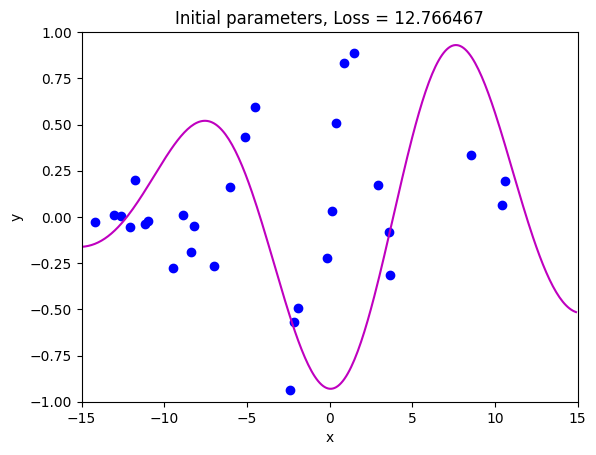

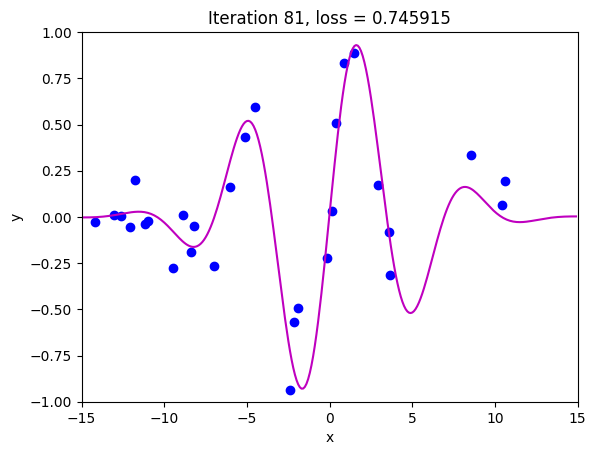

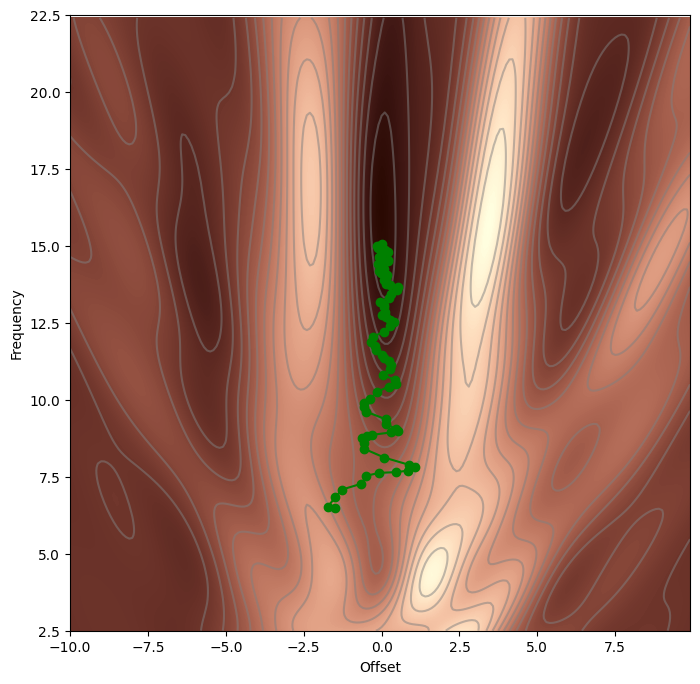

In [85]:
# Momentum ekleyerek gradyan inişi adımını yapalım
np.random.seed(1)  # Aynı sonuçlar almak için sabit rastgelelik
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = -1.5
phi_all[1, 0] = 6.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:,0:1], f"Initial parameters, Loss = {loss:.6f}")

for c_step in range(n_steps):
    # Rastgele batch indexlerini seç
    batch_index = np.random.permutation(data.shape[1])[0:batch_size]
    # Gradyanı hesapla
    gradient = compute_gradient(data[0,batch_index], data[1,batch_index], phi_all[:,c_step:c_step+1])
    # Momentum hesapla
    momentum = beta * momentum + (1 - beta) * gradient
    # Parametreleri güncelle
    phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * momentum

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data, model, phi_all[:,c_step+1], f"Iteration {c_step+1}, loss = {loss:.6f}")
draw_loss_function(compute_loss, data, model, phi_all)


###11. Nesterov Momentum Ekleyerek İyileştirme

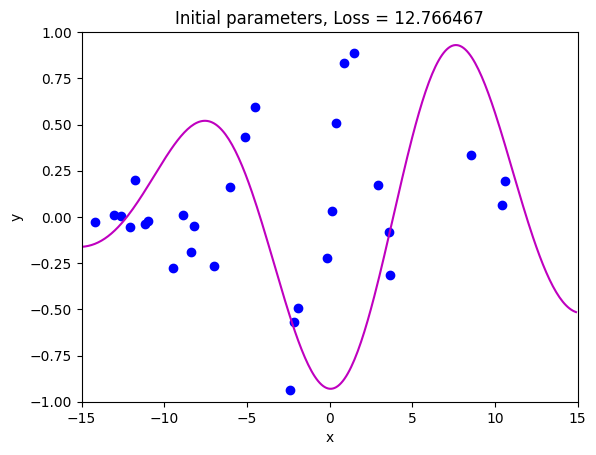

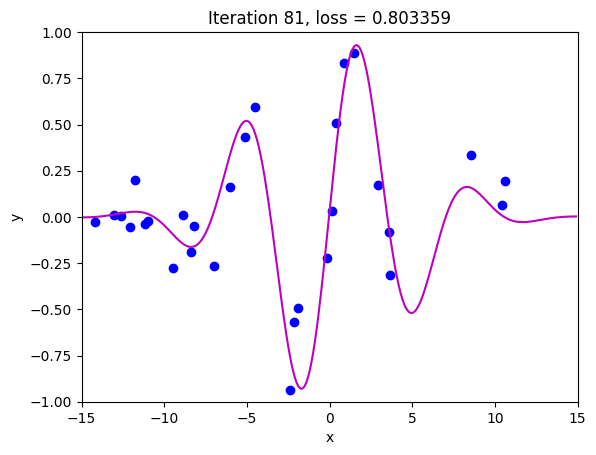

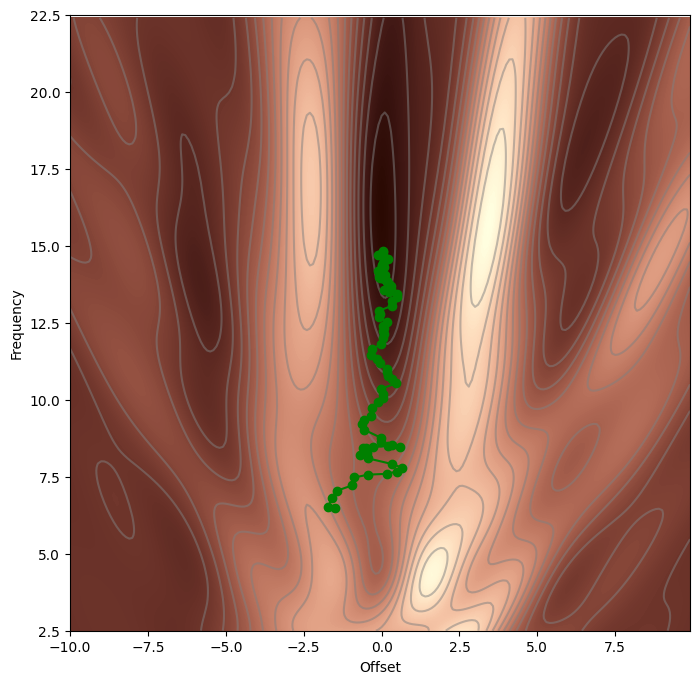

In [86]:
# Nesterov momentum ekleyelim
np.random.seed(1)  # Aynı sonuçlar almak için sabit rastgelelik
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2, n_steps + 1))
phi_all[0, 0] = -1.5
phi_all[1, 0] = 6.5

# Kaybı ölç ve ilk modeli çiz
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:,0:1], f"Initial parameters, Loss = {loss:.6f}")

for c_step in range(n_steps):
    # Nesterov momentum hesaplama
    phi_pred = phi_all[:, c_step:c_step+1] - beta * momentum
    batch_index = np.random.permutation(data.shape[1])[0:batch_size]
    gradient = compute_gradient(data[0,batch_index], data[1,batch_index], phi_pred)
    # Momentum hesapla
    momentum = beta * momentum + (1 - beta) * gradient
    # Parametreleri güncelle
    phi_all[:, c_step+1:c_step+2] = phi_all[:, c_step:c_step+1] - alpha * momentum

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data, model, phi_all[:,c_step+1], f"Iteration {c_step+1}, loss = {loss:.6f}")
draw_loss_function(compute_loss, data, model, phi_all)


#Notebook 6.5: Adam

###1. Gerekli Kütüphaneleri İçe Aktarma

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


###2. Kayıp Fonksiyonu Tanımlama

In [88]:
# Kayıp fonksiyonumuzu tanımlayalım
def loss(phi0, phi1):
    height = np.exp(-0.5 * (phi1 * phi1) * 4.0)
    height = height * np.exp(-0.5 * (phi0 - 0.7) * (phi0 - 0.7) / 4.0)
    return 1.0 - height


###3. Gradyan Hesaplama

In [89]:
# Bu fonksiyon, kayıp fonksiyonunun gradyanını hesaplayacaktır
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001
    gradient = np.zeros((2,1))
    gradient[0] = (loss(phi0 + delta_phi / 2.0, phi1) - loss(phi0 - delta_phi / 2.0, phi1)) / delta_phi
    gradient[1] = (loss(phi0, phi1 + delta_phi / 2.0) - loss(phi0, phi1 - delta_phi / 2.0)) / delta_phi
    return gradient[:,0]


###4. Kayıp Fonksiyonunun Görselleştirilmesi

In [90]:
# Kayıp fonksiyonunu çizmek için fonksiyon
def get_loss_function_for_plot():
    grid_values = np.arange(-1.0, 1.0, 0.01)
    phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
    loss_function = np.zeros((grid_values.size, grid_values.size))
    for idphi0, phi0 in enumerate(grid_values):
        for idphi1, phi1 in enumerate(grid_values):
            loss_function[idphi0, idphi1] = loss(phi1, phi0)
    return loss_function, phi0mesh, phi1mesh


###5. Kayıp Fonksiyonu için Renk Haritası

In [91]:
# Renk haritası tanımlayalım
my_colormap_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element, base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec / (256 * 256))
g = np.floor((my_colormap_vals_dec - r * 256 * 256) / 256)
b = np.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)
my_colormap_vals = np.vstack((r, g, b)).transpose() / 255.0
my_colormap = ListedColormap(my_colormap_vals)


###6. Fonksiyonu Çizme

In [92]:
# Çizim fonksiyonu
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, opt_path):
    fig = plt.figure()
    ax = plt.axes()
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap)
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.plot(opt_path[0,:], opt_path[1,:], '-', color='#a0d9d3ff')
    ax.plot(opt_path[0,:], opt_path[1,:], '.', color='#a0d9d3ff', markersize=10)
    ax.set_xlabel(r"$\phi_0$")
    ax.set_ylabel(r"$\phi_1$")
    plt.show()


###7. Sabit Adım Boyutuyla Gradyan İnişi

In [93]:
# Sabit adım boyutu ile gradyan inişi
def grad_descent(start_posn, n_steps, alpha):
    grad_path = np.zeros((2, n_steps + 1))
    grad_path[:, 0] = start_posn[:, 0]
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0, c_step], grad_path[1, c_step])
        grad_path[:, c_step + 1] = grad_path[:, c_step] - alpha * this_grad
    return grad_path


###8. Gradyan İnişini Çalıştırma

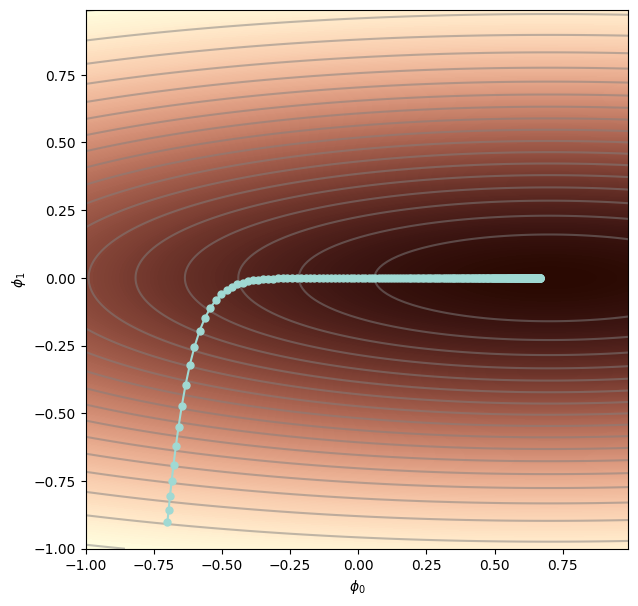

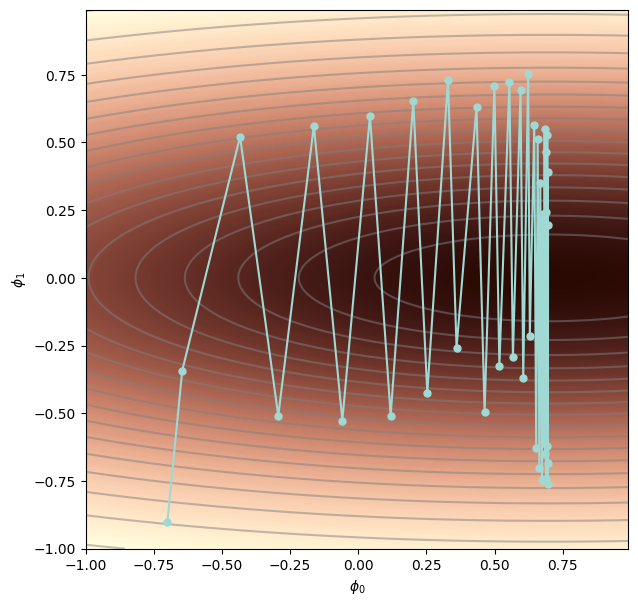

In [94]:
# Kayıp fonksiyonunu ve gradyan inişini çizelim
loss_function, phi0mesh, phi1mesh = get_loss_function_for_plot()

start_posn = np.zeros((2, 1))
start_posn[0, 0] = -0.7
start_posn[1, 0] = -0.9

# Gradyan inişi
grad_path1 = grad_descent(start_posn, n_steps=200, alpha=0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

grad_path2 = grad_descent(start_posn, n_steps=40, alpha=1.0)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path2)


###9. Normalize Edilmiş Gradyanlar

In [95]:
# Normalize edilmiş gradyanlar fonksiyonu
def normalized_gradients(start_posn, n_steps, alpha, epsilon=1e-20):
    grad_path = np.zeros((2, n_steps + 1))
    grad_path[:, 0] = start_posn[:, 0]
    for c_step in range(n_steps):
        # Gradyanı ölç
        m = get_loss_gradient(grad_path[0, c_step], grad_path[1, c_step])
        # TODO: Gradyanları normalize et (6.13 - ikinci satır)
        v = np.sum(m**2)

        # TODO: Güncelleme kuralını uygula (6.14)
        grad_path[:, c_step + 1] = grad_path[:, c_step] - alpha * m / np.sqrt(v + epsilon)

    return grad_path


###10. Normalize Edilmiş Gradyanlar ile Çalışma

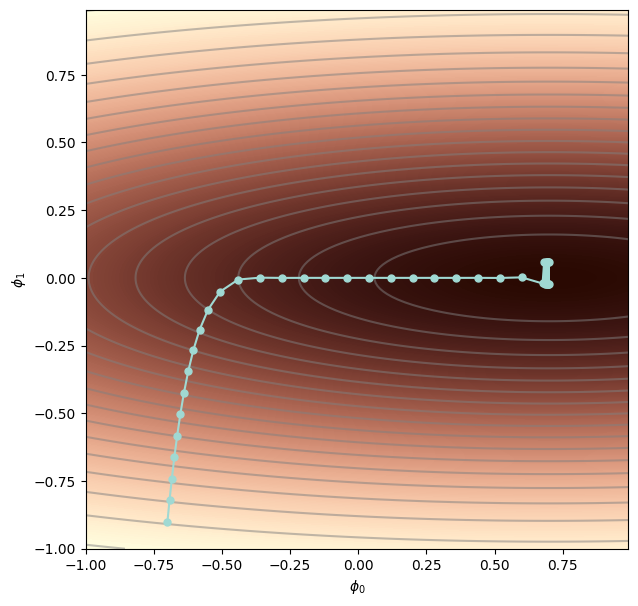

In [96]:
# Normalize edilmiş gradyanlarla deneyelim
start_posn = np.zeros((2, 1))
start_posn[0, 0] = -0.7
start_posn[1, 0] = -0.9

# Gradyan inişi
grad_path1 = normalized_gradients(start_posn, n_steps=40, alpha=0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)


###11. Adam Algoritmasını Tanımlama

In [97]:
# Adam algoritması
def adam(start_posn, n_steps, alpha, beta=0.9, gamma=0.99, epsilon=1e-20):
    grad_path = np.zeros((2, n_steps + 1))
    grad_path[:, 0] = start_posn[:, 0]
    m = np.zeros_like(grad_path[:, 0])
    v = np.zeros_like(grad_path[:, 0])
    for c_step in range(n_steps):
        # Gradyanı ölç
        grad = get_loss_gradient(grad_path[0, c_step], grad_path[1, c_step])

        # TODO: Momentumlu gradyan tahminini güncelle (6.15 - ilk satır)
        m = beta * m + (1 - beta) * grad

        # TODO: Momentumu baz alarak karelenmiş gradyanı güncelle (6.15 - ikinci satır)
        v = gamma * v + (1 - gamma) * grad**2

        # TODO: İstatistikleri 6.16'ya göre güncelle
        m_tilde = m / (1 - beta**(c_step + 1))
        v_tilde = v / (1 - gamma**(c_step + 1))

        # TODO: Güncelleme kuralını uygula (6.17)
        grad_path[:, c_step + 1] = grad_path[:, c_step] - alpha * m_tilde / (np.sqrt(v_tilde) + epsilon)

    return grad_path


###12. Adam Algoritmasını Çalıştırma

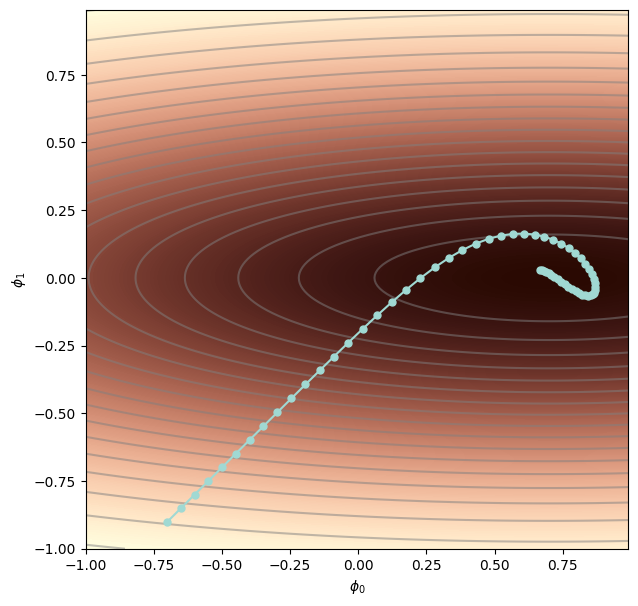

In [98]:
# Adam algoritmasını çalıştıralım
start_posn = np.zeros((2, 1))
start_posn[0, 0] = -0.7
start_posn[1, 0] = -0.9

# Adam algoritması ile gradyan inişi
grad_path1 = adam(start_posn, n_steps=60, alpha=0.05)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)
